Tujuan Analisis:

* Mengelompokkan pelanggan supermarket ke dalam beberapa segmen menggunakan metode K-Means Clustering.

* Menganalisis pola pembelian pelanggan berdasarkan variabel seperti pendapatan, frekuensi pembelian, dan jumlah uang yang dikeluarkan.

* Mengidentifikasi faktor-faktor yang mempengaruhi perilaku pelanggan menggunakan regresi linier.

Stakeholder : TIM Customer Retention Management

Insight dari Analisis:

Segmentasi Pelanggan:

* Pelanggan terbagi menjadi tiga segmen utama: Loyal, New, Regular

* Segmen Loyal memiliki rata-rata pengeluaran yang lebih tinggi dan sering melakukan pembelian dibandingkan segmen lainnya.

* Segmen At Risk memiliki frekuensi pembelian rendah dan cenderung tidak loyal terhadap supermarket.

Pola Pembelian:

* Pelanggan dengan pendapatan lebih tinggi cenderung menghabiskan lebih banyak uang di supermarket.

* Pelanggan dengan anak di rumah memiliki pola pembelian yang berbeda dibandingkan pelanggan tanpa anak.

* Frekuensi kunjungan ke toko berhubungan erat dengan jumlah pengeluaran bulanan.

* Faktor yang Mempengaruhi Perilaku Pelanggan:

* Hasil regresi linier menunjukkan bahwa pendapatan dan jumlah transaksi memiliki dampak signifikan terhadap total pengeluaran.

* Promosi dan diskon mempengaruhi keputusan pembelian pelanggan, terutama bagi segmen At Risk.

Rekomendasi Bisnis:

Strategi untuk Segmen At Risk:

* Berikan promosi khusus atau program loyalitas untuk meningkatkan retensi pelanggan.

* Kirimkan penawaran berbasis preferensi produk pelanggan guna meningkatkan engagement.

Optimalisasi Segmen Loyal:

* Fokus pada program eksklusif seperti membership premium atau diskon khusus untuk meningkatkan loyalitas mereka.

* Gunakan strategi cross-selling dengan menawarkan produk tambahan berdasarkan riwayat pembelian.

Meningkatkan Engagement Pelanggan Potential:

* Personalisasi komunikasi pemasaran untuk mendorong pelanggan menjadi lebih aktif.

* Dorong pelanggan dalam segmen ini untuk meningkatkan frekuensi pembelian melalui insentif berbasis jumlah transaksi.

Peningkatan Efektivitas Promosi:

* Analisis efektivitas kampanye pemasaran berbasis data untuk mengidentifikasi strategi yang paling berhasil.

* Sesuaikan promosi berdasarkan pola pembelian pelanggan untuk memaksimalkan konversi penjualan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [2]:
# Load dataset
file_path = "/Users/fikrimaulana/Downloads/Supermarket Customers.csv"
df = pd.read_csv(file_path, sep="\t")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dari data diatas terdapat satu kolom yang tidak ada nilainya(null)

In [5]:
df.duplicated().sum()

0

Dataset tidak mempunyai value yang duplikat

In [6]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [7]:
df["Marital_Status"] = df["Marital_Status"].replace({
    "Divorced": "Others", "Together": "Others", "Widow": "Others", 
    "Alone": "Others", "Absurd": "Others", "YOLO": "Others"
})
df["Marital_Status"].unique()

array(['Single', 'Others', 'Married'], dtype=object)

Membuat kolom Marital status menjadi 3 kategori saja yaitu : Married, Single dan Others

In [8]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [9]:
df["Education"] = df["Education"].replace({
    "2n Cycle": "Basic", "Basic": "Basic", 
    "Graduation": "Middle", "Master": "Master", "PhD": "Master"
})
df["Education"].unique()

array(['Middle', 'Master', 'Basic'], dtype=object)

Membuat kolom Education menjadi 3 kategori saja yaitu : Basic, Middle dan Master

In [10]:
df["Partner"] = df["Kidhome"] + df["Teenhome"]
df.drop(columns=["Kidhome", "Teenhome"], inplace=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Partner
0,5524,1957,Middle,Single,58138.0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Middle,Single,46344.0,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Middle,Others,71613.0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Middle,Others,26646.0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,Master,Married,58293.0,19-01-2014,94,173,43,118,...,0,0,0,0,0,0,3,11,0,1


Membuat satu kolom baru yaitu Partner, dari hasil penjumlahan kolom Kidhome dan Teenhome, serta menghapus kedua kolom tersebut agar tidak ada redundan

In [11]:
df["Monetary"] = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)
df['Monetary'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Monetary, dtype: int64

Membuat kolom baru yaitu monetary, bisa disebut sebagai kolom spending karena isinya adalah penjumlahan semua pembelian produk dari wines, fruits, meat, fish, sweet dan gold

In [12]:
df["Frequency"] = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Partner,Monetary,Frequency
0,5524,1957,Middle,Single,58138.0,04-09-2012,58,635,88,546,...,0,0,0,0,3,11,1,0,1617,22
1,2174,1954,Middle,Single,46344.0,08-03-2014,38,11,1,6,...,0,0,0,0,3,11,0,2,27,4
2,4141,1965,Middle,Others,71613.0,21-08-2013,26,426,49,127,...,0,0,0,0,3,11,0,0,776,20
3,6182,1984,Middle,Others,26646.0,10-02-2014,26,11,4,20,...,0,0,0,0,3,11,0,1,53,6
4,5324,1981,Master,Married,58293.0,19-01-2014,94,173,43,118,...,0,0,0,0,3,11,0,1,422,14


Membuat kolom baru Frequency untuk menentukan seberapa sering kustomer belanja dengan penjumlahan pembelian semua chanel

In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

mengganti format untuk kolom Dt_Customer menjadi hari-bulan-tahun

In [14]:
df["Age"] = 2015 - df["Year_Birth"]
df.drop(columns=["Year_Birth"], inplace=True)
df['Age'].head()

0    58
1    61
2    50
3    31
4    34
Name: Age, dtype: int64

membuat kolom baru 'Age' untuk menentukan umur tiap customer, dengan cara mengurangi tahun 2015 ke kolom 'Year_Birth'

In [15]:
df.isna().sum()[df.isna().sum() > 0]

Income    24
dtype: int64

memastikan apakah ada value yang kosong, setelah dicek ada value kosong di kolom 'Income' sebanyak 24

In [16]:
df[pd.isna(df['Income'])]

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Partner,Monetary,Frequency,Age
10,1994,Middle,Married,NaN,2013-11-15,11,5,5,6,0,...,0,0,0,3,11,0,1,19,3,32
27,5255,Middle,Single,NaN,2013-02-20,19,5,1,3,3,...,0,0,0,3,11,0,1,637,27,29
43,7281,Master,Single,NaN,2013-11-05,80,81,11,50,3,...,0,0,0,3,11,0,0,186,8,56
48,7244,Middle,Single,NaN,2014-01-01,96,48,5,48,6,...,0,0,0,3,11,0,3,124,7,64
58,8557,Middle,Single,NaN,2013-06-17,57,11,3,22,2,...,0,0,0,3,11,0,1,46,5,33
71,10629,Basic,Married,NaN,2012-09-14,25,25,3,43,17,...,0,0,0,3,11,0,1,109,6,42
90,8996,Master,Married,NaN,2012-11-19,4,230,42,192,49,...,0,0,0,3,11,0,3,603,17,58
91,9235,Middle,Single,NaN,2014-05-27,45,7,0,8,2,...,0,0,0,3,11,0,2,18,3,58
92,5798,Master,Others,NaN,2013-11-23,87,445,37,359,98,...,0,0,0,3,11,0,0,985,14,42
128,8268,Master,Married,NaN,2013-07-11,23,352,0,27,10,...,0,0,0,3,11,0,1,404,14,54


In [17]:
df.describe()

,ID,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Partner,Monetary,Frequency,Age
count,2240.000000,2216.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52247.251354,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.950446,605.798214,12.537054,46.194196
min,0.000000,1730.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,5.000000,0.000000,19.000000
25%,2828.250000,35303.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,68.750000,6.000000,38.000000
50%,5458.500000,51381.500000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,396.000000,12.000000,45.000000
75%,8427.750000,68522.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,1045.500000,18.000000,56.000000
max,11191.000000,666666.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,3.000000,2525.000000,32.000000,122.000000
std,3246.662198,25173.076661,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.751803,602.249288,7.205741,11.984069


In [18]:
correlation_matrix = df[["Income"] + ['Monetary']].corr()
income_correlation = correlation_matrix["Income"].sort_values(ascending=False)
income_correlation

Income      1.000000
Monetary    0.667576
Name: Income, dtype: float64

mencari kolerasi kolom income terhadap kolom monetary, dan setelah di cek tingkat kolerasinya tinggi, dan berbanding lurus

In [19]:
# Memeriksa kembali missing values
missing_before = df["Income"].isna().sum()

# Memisahkan data dengan nilai Income yang tersedia dan yang hilang
df_missing_income = df[df["Income"].isna()]
df_available_income = df.dropna(subset=["Income"])

# Fitur (X) dan target (y) untuk model regresi
X_train = df_available_income[['Monetary']]
y_train = df_available_income["Income"]

# Melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi nilai Income yang hilang
X_missing = df_missing_income[['Monetary']]
predicted_income = model.predict(X_missing)

# Mengisi nilai yang hilang dengan prediksi
df.loc[df["Income"].isna(), "Income"] = predicted_income

# Verifikasi apakah masih ada nilai yang hilang
missing_after = df["Income"].isna().sum()

missing_before, missing_after

(24, 0)

setelah tahu kolerasi income dan monetary maka untuk mengisi kolom income yang kosong dengan cara menggunakan metode linear regression

In [20]:
current = '31-12-2015'
currents = pd.to_datetime(current, format='%d-%m-%Y')
df['Length'] = (currents - df['Dt_Customer']).dt.days
df.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Partner,Monetary,Frequency,Age,Length
0,5524,Middle,Single,58138.0,2012-09-04,58,635,88,546,172,...,0,0,3,11,1,0,1617,22,58,1213
1,2174,Middle,Single,46344.0,2014-03-08,38,11,1,6,2,...,0,0,3,11,0,2,27,4,61,663
2,4141,Middle,Others,71613.0,2013-08-21,26,426,49,127,111,...,0,0,3,11,0,0,776,20,50,862
3,6182,Middle,Others,26646.0,2014-02-10,26,11,4,20,10,...,0,0,3,11,0,1,53,6,31,689
4,5324,Master,Married,58293.0,2014-01-19,94,173,43,118,46,...,0,0,3,11,0,1,422,14,34,711


membuat kolom baru length untuk mencatat customer yang paling loyal karena dihitung dari tanggal customer membuat member hingga tanggal saat ini yang diambil dari tanggal 31-12-2015

In [21]:
df.drop(columns=["Dt_Customer"], inplace=True)

menghapus kolom Dt_Customer karena sudah tidak dipakai dalam analisis

In [22]:
campaign_columns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
df["Total_Campaign"] = df[campaign_columns].sum(axis=1)
df.drop(columns=campaign_columns, inplace=True)
df.head()

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Partner,Monetary,Frequency,Age,Length,Total_Campaign
0,5524,Middle,Single,58138.0,58,635,88,546,172,88,...,7,0,3,11,0,1617,22,58,1213,1
1,2174,Middle,Single,46344.0,38,11,1,6,2,1,...,5,0,3,11,2,27,4,61,663,0
2,4141,Middle,Others,71613.0,26,426,49,127,111,21,...,4,0,3,11,0,776,20,50,862,0
3,6182,Middle,Others,26646.0,26,11,4,20,10,3,...,6,0,3,11,1,53,6,31,689,0
4,5324,Master,Married,58293.0,94,173,43,118,46,27,...,5,0,3,11,1,422,14,34,711,0


menggabungkan semua kolom campaign menjadi satu karena tidak ada penjelasan terhadap tiap campaign nya, dan menghapusnya agar tidak ada redundan

In [23]:
df.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)
df.head()

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Partner,Monetary,Frequency,Age,Length,Total_Campaign
0,5524,Middle,Single,58138.0,58,635,88,546,172,88,...,10,4,7,0,0,1617,22,58,1213,1
1,2174,Middle,Single,46344.0,38,11,1,6,2,1,...,1,2,5,0,2,27,4,61,663,0
2,4141,Middle,Others,71613.0,26,426,49,127,111,21,...,2,10,4,0,0,776,20,50,862,0
3,6182,Middle,Others,26646.0,26,11,4,20,10,3,...,0,4,6,0,1,53,6,31,689,0
4,5324,Master,Married,58293.0,94,173,43,118,46,27,...,3,6,5,0,1,422,14,34,711,0


menghapus kolom z_costcontact dan z_revenue karena value di kolom itu bersifat stagnan dan tidak ada perbedaan

In [24]:
df.rename(columns={'MntWines': 'Wine_Spending', 'MntFruits': 'Fruit_Spending', 'MntMeatProducts': 'Meat_Spending',
                    'MntFishProducts': 'Fish_Spending', 'MntSweetProducts': 'Sweet_Spending', 'MntGoldProds': 'Gold_Spending',
                    'NumDealsPurchases':'Discount_Purchases','NumWebPurchases':'Web_Purchases','NumCatalogPurchases':
                    'Catalog_Purchases','NumStorePurchases':'Store_Purchases','NumWebVisitsMonth':'Monthly_Web_Visit'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2240 non-null   int64  
 1   Education           2240 non-null   object 
 2   Marital_Status      2240 non-null   object 
 3   Income              2240 non-null   float64
 4   Recency             2240 non-null   int64  
 5   Wine_Spending       2240 non-null   int64  
 6   Fruit_Spending      2240 non-null   int64  
 7   Meat_Spending       2240 non-null   int64  
 8   Fish_Spending       2240 non-null   int64  
 9   Sweet_Spending      2240 non-null   int64  
 10  Gold_Spending       2240 non-null   int64  
 11  Discount_Purchases  2240 non-null   int64  
 12  Web_Purchases       2240 non-null   int64  
 13  Catalog_Purchases   2240 non-null   int64  
 14  Store_Purchases     2240 non-null   int64  
 15  Monthly_Web_Visit   2240 non-null   int64  
 16  Compla

memperbaiki penamaan kolom agar lebih enak dalam pembacaan

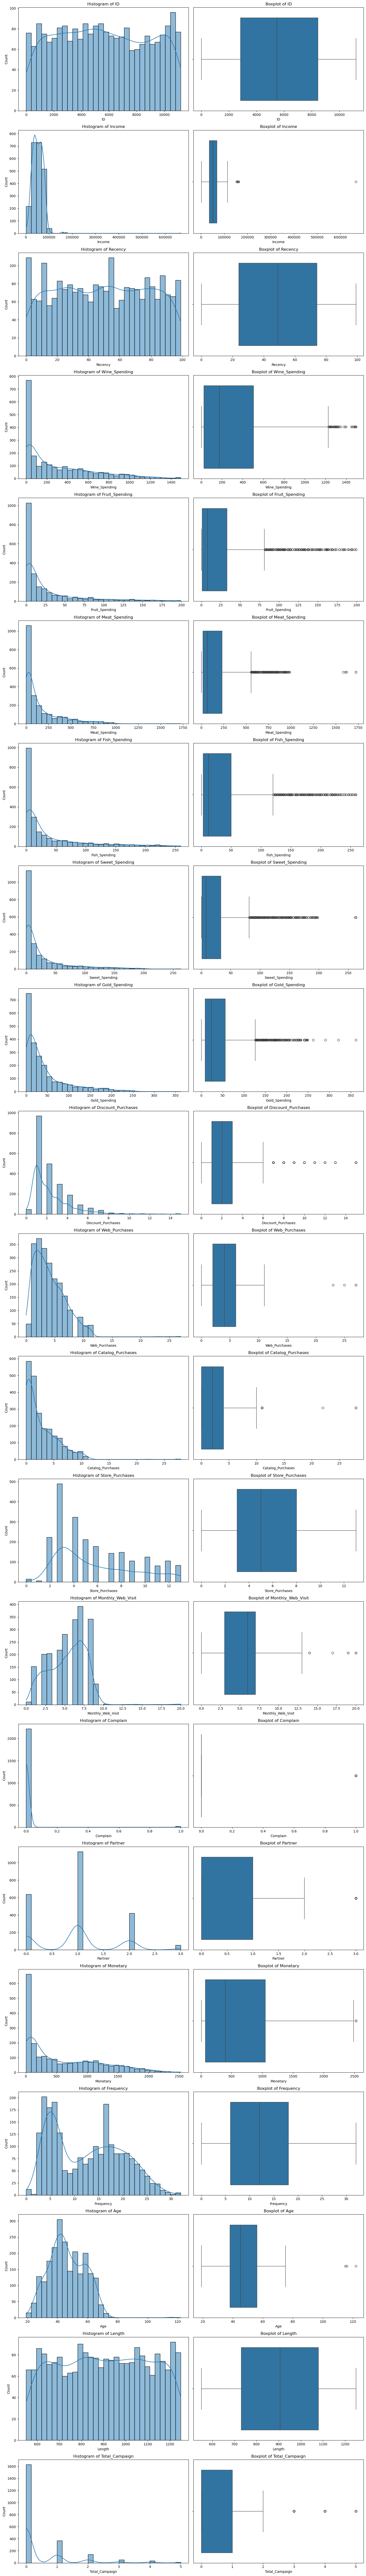

In [25]:
# Memilih hanya kolom bertipe integer
int_columns = df.select_dtypes(include=['int','float']).columns

# Visualisasi distribusi kolom integer dengan histogram dan boxplot
num_columns = len(int_columns)
fig, axes = plt.subplots(num_columns, 2, figsize=(15, num_columns * 5))

for i, col in enumerate(int_columns):
    # Histogram
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

mencari outlier dalam setiap kolom yang bernilai numerik

In [26]:
df['Age'].nlargest(10)

239     122
339     116
192     115
1950     75
424      74
39       72
358      72
415      72
894      72
1150     72
Name: Age, dtype: int64

In [27]:
df = df[df['Age'] < 100]
df['Age'].nlargest(10)

1950    75
424     74
39      72
358     72
415     72
894     72
1150    72
1923    72
2084    72
494     71
Name: Age, dtype: int64

menghapus outlier dari kolom age, karena manusia yang masih belanja diatas 100 tahun sendirian itu sudah tidak relevan

In [28]:
df["Income"].nlargest(10)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
Name: Income, dtype: float64

In [29]:
df = df[df['Income'] != 666666]
df["Income"].nlargest(10)

617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
252     102692.0
Name: Income, dtype: float64

menghapus outlier dari kolom income, karena loncatan nilainya terlalu jauh

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2236 non-null   int64  
 1   Education           2236 non-null   object 
 2   Marital_Status      2236 non-null   object 
 3   Income              2236 non-null   float64
 4   Recency             2236 non-null   int64  
 5   Wine_Spending       2236 non-null   int64  
 6   Fruit_Spending      2236 non-null   int64  
 7   Meat_Spending       2236 non-null   int64  
 8   Fish_Spending       2236 non-null   int64  
 9   Sweet_Spending      2236 non-null   int64  
 10  Gold_Spending       2236 non-null   int64  
 11  Discount_Purchases  2236 non-null   int64  
 12  Web_Purchases       2236 non-null   int64  
 13  Catalog_Purchases   2236 non-null   int64  
 14  Store_Purchases     2236 non-null   int64  
 15  Monthly_Web_Visit   2236 non-null   int64  
 16  Complain   

Analisis menggunakan model LRFM untuk menentukan segmentasi lebih lanjut menggunakan metode penambangan data K-Means untuk menentukan tipe customer

In [31]:
df[['Length','Recency','Frequency','Monetary']].head()

,Length,Recency,Frequency,Monetary
0,1213,58,22,1617
1,663,38,4,27
2,862,26,20,776
3,689,26,6,53
4,711,94,14,422


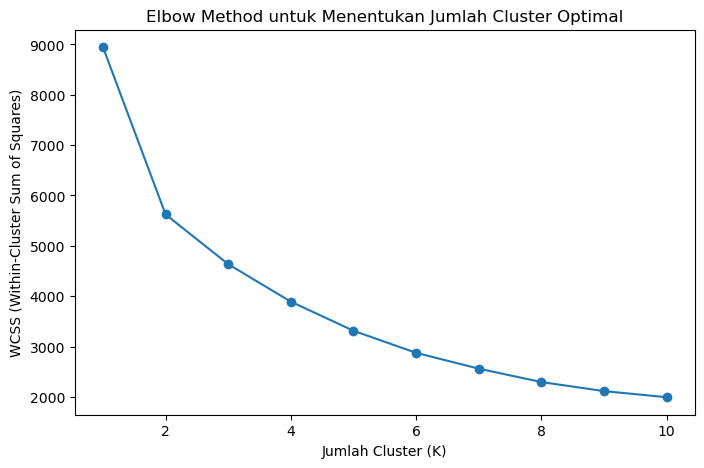

In [32]:
# Memilih fitur untuk clustering
features = ["Length", "Recency", "Frequency", "Monetary"]

# Normalisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Mencari jumlah cluster optimal dengan metode Elbow
wcss = []  # Within-Cluster Sum of Squares
K_range = range(1, 11)  # Uji dengan 1-10 cluster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Simpan nilai WCSS

# Plot hasil Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o", linestyle="-")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method untuk Menentukan Jumlah Cluster Optimal")
plt.show()

Grafik Elbow Method menunjukkan titik siku yang optimal untuk jumlah cluster. Dari grafik ini, kemungkinan jumlah cluster terbaik berada di sekitar 3 hingga 5 cluster. Percobaan menggunakan K = 4 untuk segmentasi

In [33]:
# Melakukan clustering dengan K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Melihat jumlah pelanggan di setiap cluster
df["Cluster"].value_counts().sort_index()

Cluster
0    600
1    575
2    428
3    633
Name: count, dtype: int64

In [34]:
# Menghitung rata-rata nilai LRFM untuk setiap cluster
cluster_summary = df.groupby("Cluster")[["Length", "Recency", "Frequency", "Monetary"]].mean()

# Menampilkan ringkasan
cluster_summary

,Length,Recency,Frequency,Monetary
Cluster,,,,
0,862.203333,75.231667,7.088333,152.806667
1,1091.379130,52.805217,19.520000,1197.646957
2,727.147196,44.696262,19.144860,1128.616822
3,892.184834,24.000000,6.924171,144.718799


Pelanggan terbagi ke dalam 4 segmen dengan distribusi berikut:
*	Cluster 0: 600 pelanggan
*	Cluster 1: 575 pelanggan
*	Cluster 2: 428 pelanggan
*	Cluster 3: 633 pelanggan

Berdasarkan hasil segmentasi, berikut karakteristik masing-masing cluster pelanggan:
1.	Cluster 0 & 3 (Regular Customer)
	* 	Pelanggan ini sudah menjadi member cukup lama (~2,3 tahun) namun jarang berbelanja (7x) dan terakhir belanja sudah cukup lama (75 hari lalu) sedangkan untuk Cluster 3 yaitu tergolong baru (24 hari lalu)
	* 	Potensi besar untuk dikembangkan karena bisa dijangkau dengan program promosi atau loyalty program agar lebih aktif
2.	Cluster 1 (Loyal Customer)
	* 	Pelanggan yang sudah sangat lama menjadi member (hampir 3 tahun), belanja sangat sering dan spending besar
	*	Core customer yang harus dijaga
	*	Bisa diberikan reward ekslkusif seperti voucher, special campaign, atau membership premium agar tetap loyal
3.	Cluster 2 (New Customer)
	*	Pelanggan yang cukup sering belanja dan spending yang tinggi, tetapi masa keanggotaannya tidak selama cluster 1
	*	Peluang menjadi Loyal Customer sangat besar
	*	Recency cukup baik (52 hari) → Masih cukup aktif.
	*	Strategi: Berikan program loyalty, diskon eksklusif, atau layanan premium.

In [35]:
# Buat jadi numeric cluster baru
df['Cluster_Group'] = df['Cluster'].replace({
    0: 0,  # At New
    3: 0,  # At New
    1: 1,  # Loyal
    2: 2   # Potential
})

Menggabungkan Cluster 0 dan 3 karena valuenya hampir serupa

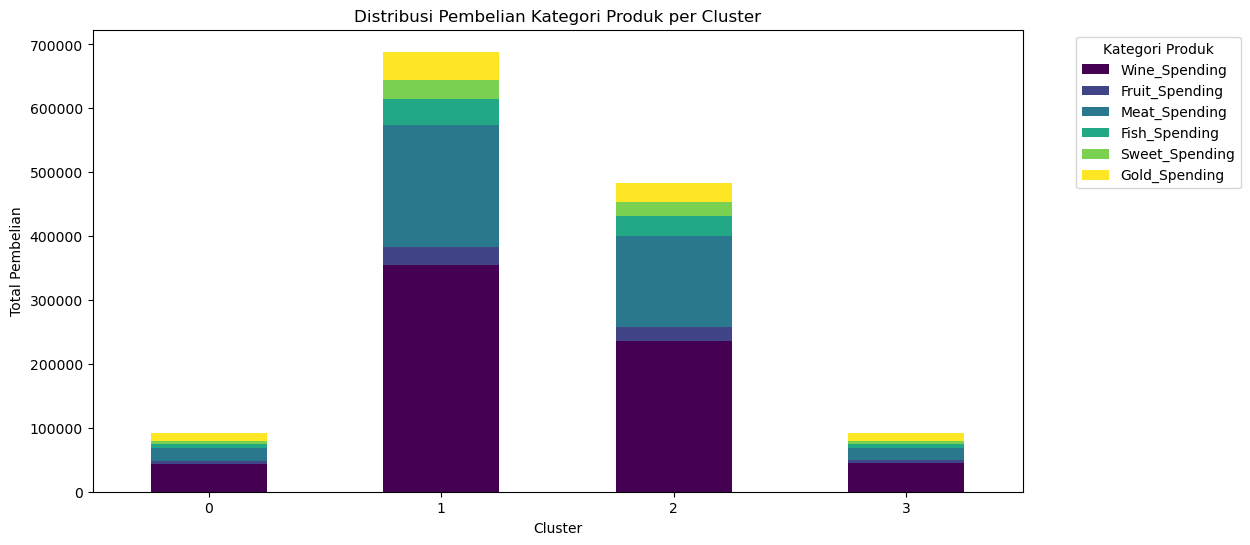

In [36]:
# Daftar kategori produk yang akan dianalisis
product_categories = ["Wine_Spending", "Fruit_Spending", "Meat_Spending", 
                      "Fish_Spending", "Sweet_Spending", "Gold_Spending"]

# Menghitung total pembelian setiap kategori per cluster
category_per_cluster = df.groupby("Cluster")[product_categories].sum()

# Visualisasi dengan stacked bar chart
category_per_cluster.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Distribusi Pembelian Kategori Produk per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Pembelian")
plt.legend(title="Kategori Produk", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

1.	Cluster 1 & 2 memiliki pembelian tertinggi
	•	Kategori MntWines dan MntMeatProducts paling dominan.
	•	Cluster ini bisa terdiri dari pelanggan dengan daya beli tinggi atau kebutuhan konsumsi tinggi.
2.	Cluster 0 & 3 memiliki pembelian lebih rendah
	•	Masih membeli produk dari semua kategori tetapi dalam jumlah lebih kecil.
	•	Kemungkinan pelanggan baru atau kurang aktif dalam belanja.

/var/folders/jh/3gj_twjn05z7rk56ml5f771m0000gn/T/ipykernel_2451/3957619229.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_per_cluster.index, y=campaign_per_cluster.values, palette="viridis")


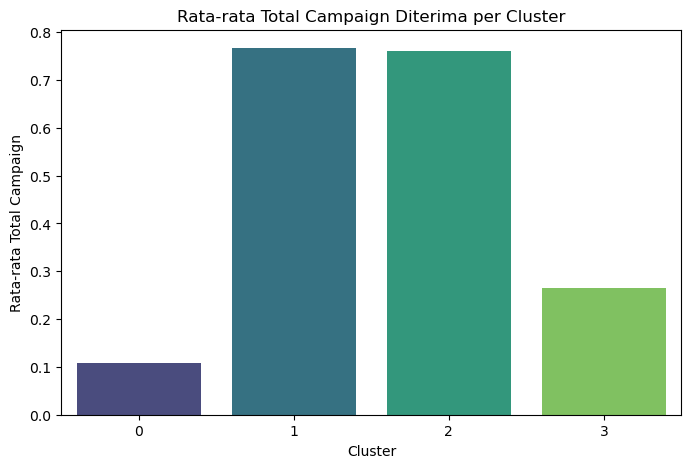

In [37]:
# Menghitung distribusi rata-rata total campaign per cluster
campaign_per_cluster = df.groupby("Cluster")["Total_Campaign"].mean()

# Visualisasi dengan bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=campaign_per_cluster.index, y=campaign_per_cluster.values, palette="viridis")
plt.title("Rata-rata Total Campaign Diterima per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Rata-rata Total Campaign")
plt.xticks(rotation=0)
plt.show()

1.	Cluster 0 & 3 memiliki tingkat penerimaan campaign tertinggi
	*	Cluster ini lebih terlibat dengan promosi dan lebih sering menerima campaign.
	*	Mereka mungkin lebih responsif terhadap pemasaran dan lebih mudah dipengaruhi oleh campaign.
2.	Cluster 1 & 2 memiliki tingkat penerimaan campaign yang lebih rendah
	*	Pelanggan dalam cluster ini jarang menerima atau merespons campaign.
	*	Bisa jadi mereka kurang tertarik, atau tidak tersegmentasi dengan baik dalam strategi pemasaran.

/var/folders/jh/3gj_twjn05z7rk56ml5f771m0000gn/T/ipykernel_2451/614866292.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_channel_distribution = df.groupby("Age")[channel_columns].sum()


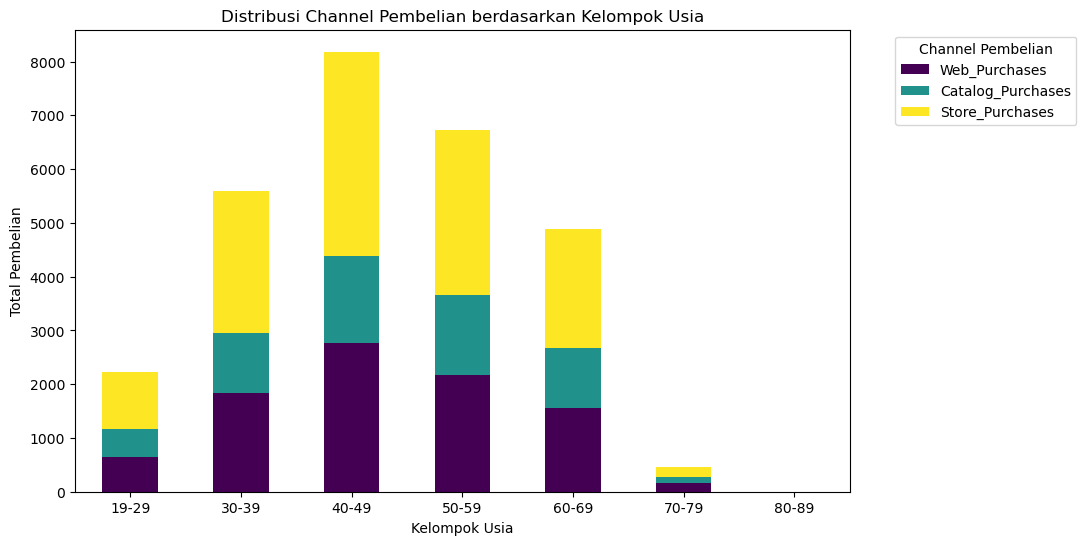

In [38]:
# Membuat rentang usia dalam interval 10 tahun
bins = [19, 30, 40, 50, 60, 70, 80, 90]
labels = ["19-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]
df['Age'] = df['Age'].astype(int)
df["Age"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# Menghitung distribusi channel pembelian berdasarkan rentang usia
channel_columns = ["Web_Purchases", "Catalog_Purchases", "Store_Purchases"]
age_channel_distribution = df.groupby("Age")[channel_columns].sum()

# Visualisasi menggunakan stacked bar chart
age_channel_distribution.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Distribusi Channel Pembelian berdasarkan Kelompok Usia")
plt.xlabel("Kelompok Usia")
plt.ylabel("Total Pembelian")
plt.legend(title="Channel Pembelian", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

1.	Kelompok 40-49 tahun mendominasi pembelian di semua channel.
	*	Store purchases (kuning) mendominasi.
	*	Web purchases (ungu) juga cukup tinggi.
	*	Catalog purchases (hijau) digunakan tetapi lebih rendah.
2.	Usia 50-59 masih cukup aktif, tetapi menurun setelah 60 tahun.
	*	Mereka lebih banyak menggunakan katalog daripada web.
3.	Usia 70+ hampir tidak ada transaksi.
	*	Ini menunjukkan bahwa mereka jarang menggunakan channel online atau katalog.

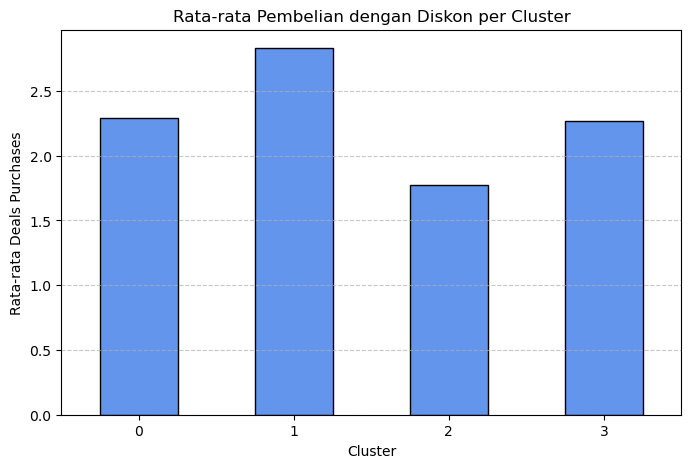

In [39]:
# Menghitung rata-rata pembelian dengan diskon (Deals Purchases) per cluster
cluster_deals_purchases = df.groupby("Cluster")["Discount_Purchases"].mean()

# Visualisasi dengan bar chart
plt.figure(figsize=(8,5))
cluster_deals_purchases.plot(kind="bar", color="cornflowerblue", edgecolor="black")

# Menambahkan detail ke grafik
plt.title("Rata-rata Pembelian dengan Diskon per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Rata-rata Deals Purchases")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

1.	Cluster 1 memiliki rata-rata pembelian diskon tertinggi.
	*	Mereka kemungkinan besar sangat sensitif terhadap diskon dan lebih suka berbelanja saat ada promo.
	*	Potensi target untuk strategi diskon dan promosi khusus.
2.	Cluster 2 memiliki jumlah pembelian diskon terendah.
	*	Mereka mungkin lebih cenderung membeli tanpa menunggu promo atau lebih loyal terhadap produk tertentu.
	*	Strategi retensi pelanggan bisa dilakukan dengan program loyalitas daripada sekadar diskon.

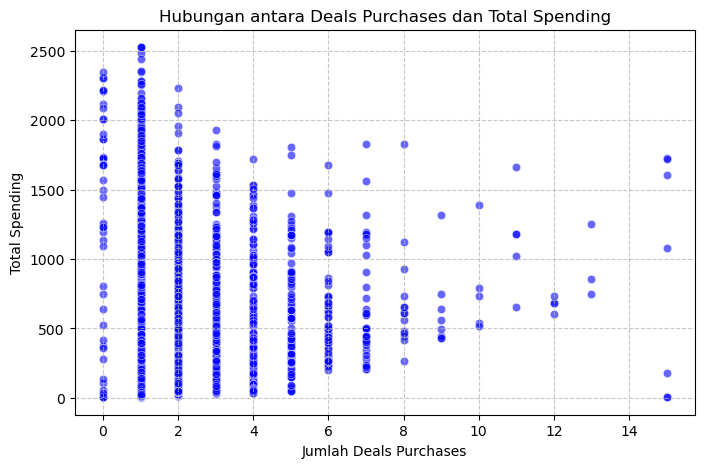

In [40]:
# Scatter plot untuk melihat hubungan antara Deals Purchases dan Total Spending
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Discount_Purchases"], y=df["Monetary"], alpha=0.6, color="blue")

# Menambahkan detail ke grafik
plt.title("Hubungan antara Deals Purchases dan Total Spending")
plt.xlabel("Jumlah Deals Purchases")
plt.ylabel("Total Spending")
plt.grid(True, linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

1.	Tidak ada korelasi kuat antara Deals Purchases dan Total Spending.
	*	Banyak pelanggan dengan total spending tinggi tetapi memiliki Deals Purchases rendah.
	*	Ini menunjukkan bahwa pelanggan besar tidak terlalu tergantung pada diskon.
2.	Sebagian besar pelanggan melakukan 0-5 Deals Purchases.
	*	Mayoritas pelanggan lebih jarang membeli dengan diskon, meskipun ada beberapa yang melakukan hingga 10+ Deals Purchases.
3.	Beberapa pelanggan dengan Deals Purchases tinggi memiliki spending tinggi, tetapi jumlahnya sedikit.
	*	Ini bisa jadi pelanggan yang memang memanfaatkan diskon secara maksimal, tetapi tetap memiliki daya beli tinggi.

/var/folders/jh/3gj_twjn05z7rk56ml5f771m0000gn/T/ipykernel_2451/856142146.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_web_visits = df.groupby("Age")["Monthly_Web_Visit"].mean()


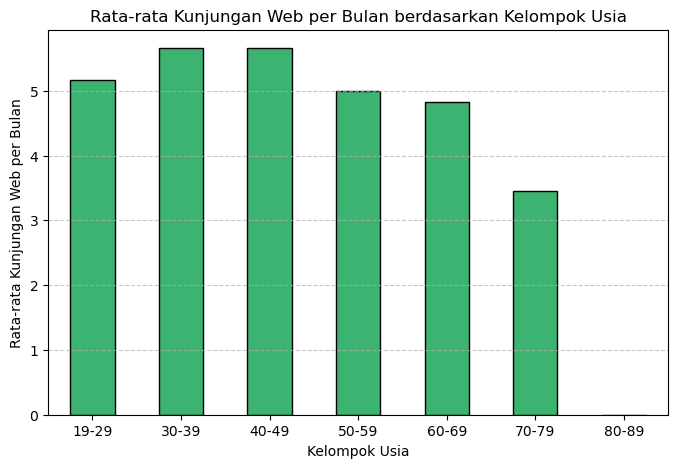

In [41]:
# Menghitung rata-rata kunjungan web berdasarkan kelompok usia
age_web_visits = df.groupby("Age")["Monthly_Web_Visit"].mean()

# Visualisasi dengan bar chart
plt.figure(figsize=(8,5))
age_web_visits.plot(kind="bar", color="mediumseagreen", edgecolor="black")

# Menambahkan detail ke grafik
plt.title("Rata-rata Kunjungan Web per Bulan berdasarkan Kelompok Usia")
plt.xlabel("Kelompok Usia")
plt.ylabel("Rata-rata Kunjungan Web per Bulan")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

1.	Kelompok usia 30-49 tahun memiliki jumlah kunjungan web tertinggi.
	*	Ini sesuai dengan pola belanja mereka yang lebih aktif di semua channel.
	*	Bisa menjadi target utama untuk promosi online dan kampanye digital.
2.	Usia 50-59 masih memiliki kunjungan web yang cukup tinggi.
	*	Menunjukkan bahwa mereka masih terbuka untuk berbelanja online, tetapi tidak seaktif kelompok 30-49 tahun.
3.	Usia 60+ memiliki jumlah kunjungan web yang jauh lebih rendah.
	*	Mereka mungkin lebih nyaman berbelanja secara langsung di toko daripada melalui website.
	*	Untuk menarik mereka ke channel online, perlu ada strategi edukasi atau promosi yang lebih persuasif.

/var/folders/jh/3gj_twjn05z7rk56ml5f771m0000gn/T/ipykernel_2451/1938578273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Partner"], y=df["Monetary"], palette="Set2")


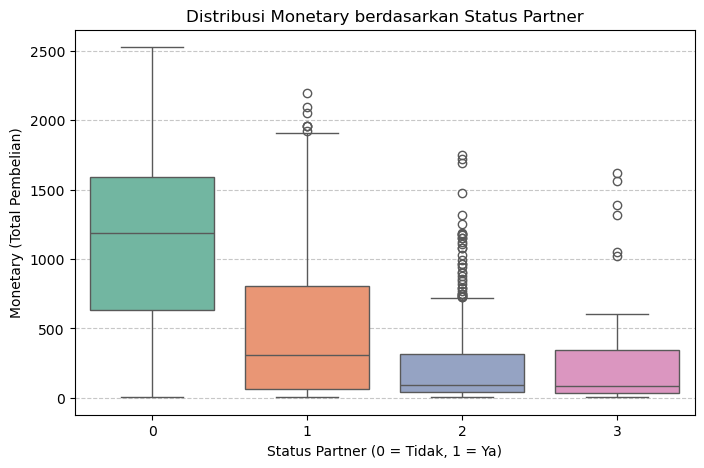

In [42]:
# Visualisasi distribusi Monetary berdasarkan Partner Status
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Partner"], y=df["Monetary"], palette="Set2")

# Menambahkan detail ke grafik
plt.title("Distribusi Monetary berdasarkan Status Partner")
plt.xlabel("Status Partner (0 = Tidak, 1 = Ya)")
plt.ylabel("Monetary (Total Pembelian)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

1.	Pelanggan dengan partner cenderung memiliki pengeluaran lebih tinggi.
	*	Median monetary lebih tinggi dibandingkan yang tidak memiliki partner.
	*	Variasi pengeluaran juga lebih besar.
2.	Beberapa pelanggan tanpa partner tetap memiliki pengeluaran tinggi.
	*	Namun, jumlahnya lebih sedikit dibandingkan yang memiliki partner.

<Figure size 800x500 with 0 Axes>

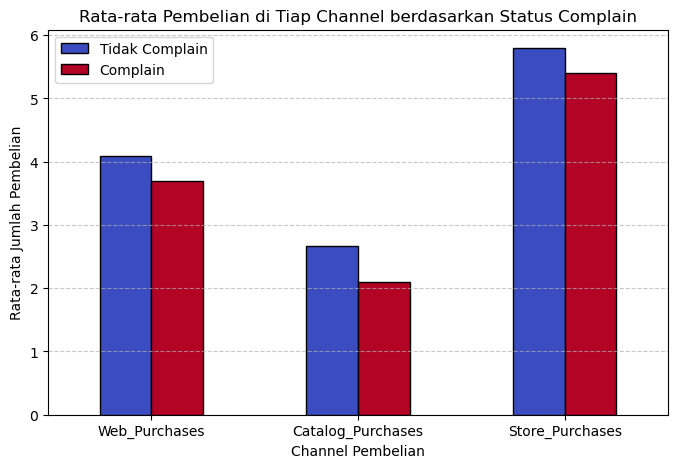

In [43]:
# Menghitung rata-rata jumlah pembelian di tiap channel berdasarkan status complain
channel_complain = df.groupby("Complain")[["Web_Purchases", "Catalog_Purchases", "Store_Purchases"]].mean()

# Visualisasi dengan bar chart
plt.figure(figsize=(8,5))
channel_complain.T.plot(kind="bar", figsize=(8,5), colormap="coolwarm", edgecolor="black")

# Menambahkan detail ke grafik
plt.title("Rata-rata Pembelian di Tiap Channel berdasarkan Status Complain")
plt.xlabel("Channel Pembelian")
plt.ylabel("Rata-rata Jumlah Pembelian")
plt.xticks(rotation=0)
plt.legend(["Tidak Complain", "Complain"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

1.	Pelanggan yang komplain memiliki lebih sedikit pembelian di semua channel.
	*	Hal ini mungkin karena ketidakpuasan menyebabkan mereka mengurangi pembelian.
2.	Channel Store memiliki perbedaan terbesar antara pelanggan yang komplain dan yang tidak.
	*	Ini bisa jadi karena pengalaman langsung di toko lebih mudah menimbulkan keluhan dibandingkan online atau katalog.
3.	Web dan Catalog Purchases relatif lebih stabil.
	*	Tidak ada perbedaan mencolok antara pelanggan yang pernah komplain dan yang tidak.

In [44]:
# 4. Ganti nama Cluster
cluster_mapping = {
    0: "At Risk Customer",
    1: "Loyal Customer",
    2: "Potential Customer",
}
df['Cluster'] = df['Cluster'].map(cluster_mapping)

# 5. Buat Pivot Product Spending
product_columns = ['Wine_Spending', 'Fruit_Spending', 'Meat_Spending', 'Fish_Spending', 'Sweet_Spending', 'Gold_Spending']
product_pivot = df[['ID'] + product_columns].melt(id_vars='ID', var_name='Product', value_name='Spending')

# 6. Buat Pivot Channel Purchase
channel_columns = ['Web_Purchases', 'Catalog_Purchases', 'Store_Purchases']
channel_pivot = df[['ID'] + channel_columns].melt(id_vars='ID', var_name='Purchase_Channel', value_name='Purchase_Count')

# 7. Summary Product & Channel
product_summary = product_pivot.groupby('ID').agg({'Spending':'sum'}).reset_index().rename(columns={'Spending':'Total_Spending'})
channel_summary = channel_pivot.groupby('ID').agg({'Purchase_Count':'sum'}).reset_index().rename(columns={'Purchase_Count':'Total_Channel_Purchase'})

# 8. Merge ke Data Utama
df_merged = df.merge(product_summary, on='ID')
df_merged = df_merged.merge(channel_summary, on='ID')

df.drop(columns=['Cluster'], inplace=True)

# 9. Simpan untuk Tableau
df_merged.to_csv('supermarket_ready_for_tableau.csv', index=False)

membuat label berdasarkan cluster, serta pivoting kolom untuk digunakan kedalam tableau serta menyimpan file yang sudah dibersihkan

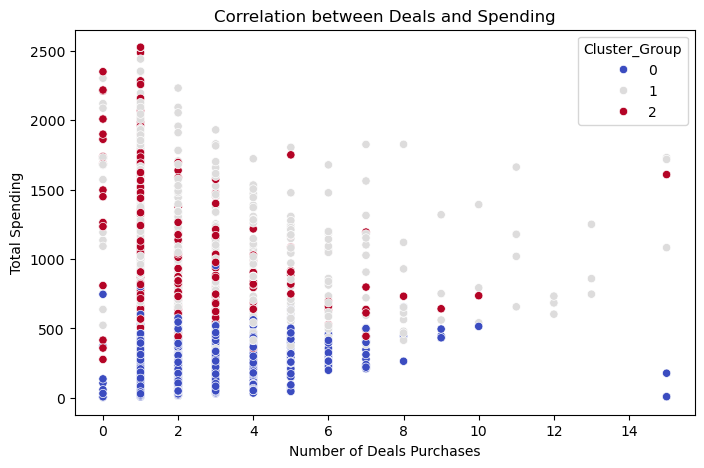

In [45]:
# 6. Korelasi deals dan spending
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Discount_Purchases'], y=df['Monetary'], hue=df['Cluster_Group'], palette='coolwarm')
plt.xlabel("Number of Deals Purchases")
plt.ylabel("Total Spending")
plt.title("Correlation between Deals and Spending")
plt.show()

data diatas menandakan bahwa spending tinggi jarang menggunakan pembelian dengan deals

Rata-rata Campaign per Customer Segment:
Cluster_Group
0    0.188970
1    0.766957
2    0.761682
Name: Total_Campaign, dtype: float64


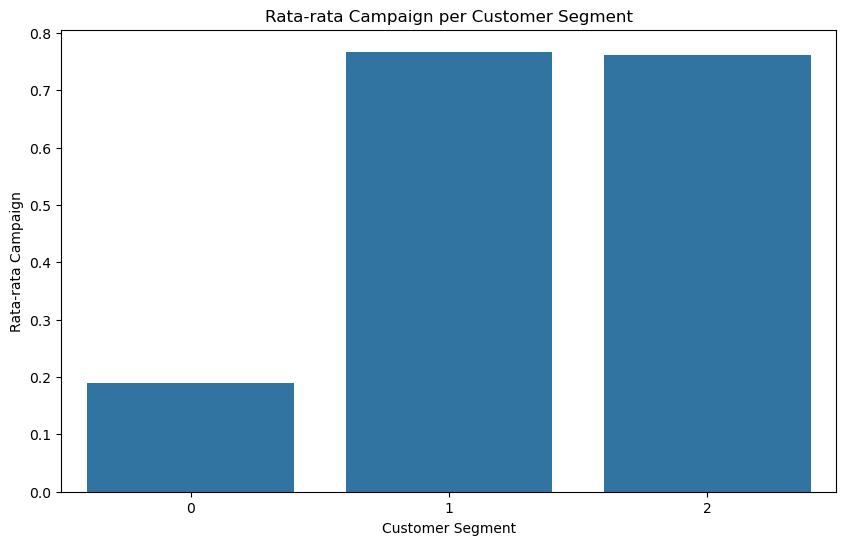

In [46]:
# Analisis Total_Campaign per Customer Segment
campaign_analysis = df.groupby('Cluster_Group')['Total_Campaign'].mean()
print("Rata-rata Campaign per Customer Segment:")
print(campaign_analysis)
# Visualisasi Total_Campaign per Customer Segment
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_analysis.index, y=campaign_analysis.values)
plt.title("Rata-rata Campaign per Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Rata-rata Campaign")
plt.show()

Customer beresiko yang paling sedikit menerima campaign, sementara untuk loyal dan potential customer sama sama banyak menerima campaign

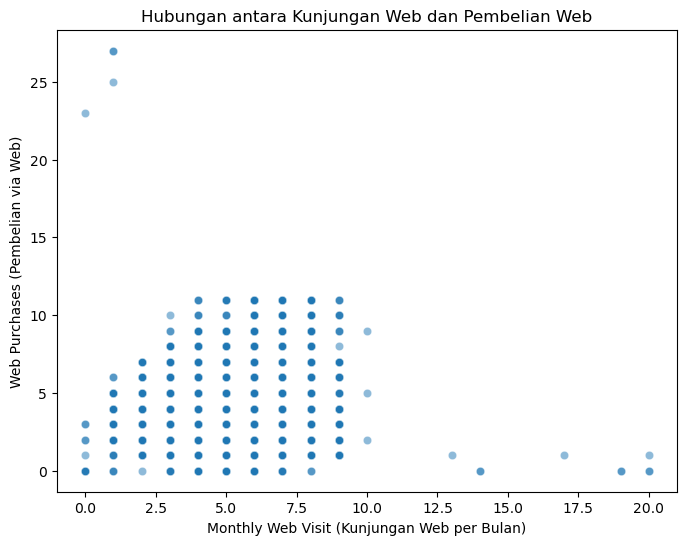

In [47]:
# Korelasi antara Web Purchases dan Monthly Web Visit
web_correlation = df[["Web_Purchases", "Monthly_Web_Visit"]].corr()

# Visualisasi hubungan antara kunjungan web dan pembelian web
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Monthly_Web_Visit"], y=df["Web_Purchases"], alpha=0.5)
plt.xlabel("Monthly Web Visit (Kunjungan Web per Bulan)")
plt.ylabel("Web Purchases (Pembelian via Web)")
plt.title("Hubungan antara Kunjungan Web dan Pembelian Web")
plt.show()

pembelian via web tidak linear dengan kunjungan web per bulan, karena semakin sedikit kunjungan maka semakin tinggi pembelian

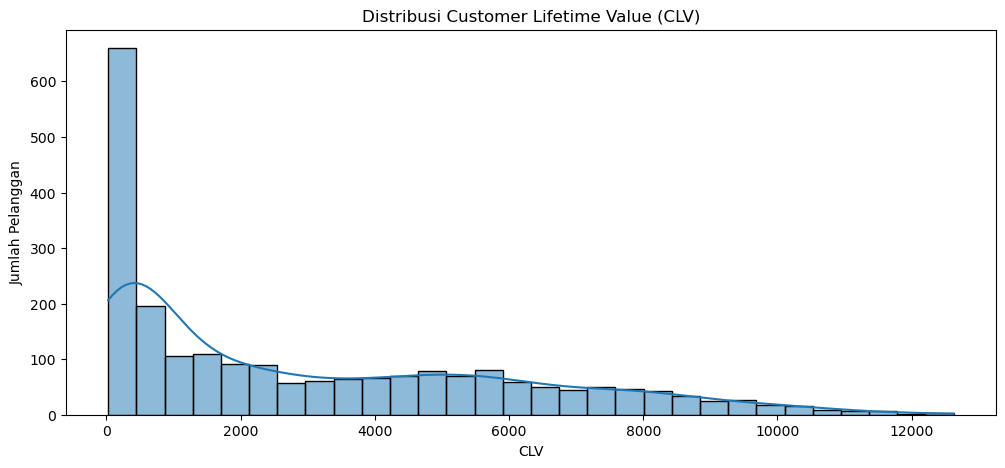

In [48]:
# 1. Customer Lifetime Value (CLV) - Estimasi sederhana: Monetary * Average Lifespan (diasumsikan 5 tahun)
df['CLV'] = df['Monetary'] * 5
plt.figure(figsize=(12, 5))
sns.histplot(df['CLV'], bins=30, kde=True)
plt.title('Distribusi Customer Lifetime Value (CLV)')
plt.xlabel('CLV')
plt.ylabel('Jumlah Pelanggan')
plt.show()


1️⃣ Distribusi Customer Lifetime Value (CLV)
📊 Visualisasi: Histogram dengan garis KDE (Kernel Density Estimation)

🔍 Apa yang dianalisis?
Histogram ini menunjukkan distribusi CLV (Customer Lifetime Value), yaitu estimasi nilai total pelanggan selama hubungan mereka dengan bisnis. CLV dihitung sebagai Monetary × 5 tahun (asumsi sederhana).

🧐 Apa insight-nya?

Jika grafik berbentuk kanan miring (positively skewed) → Sebagian besar pelanggan memiliki CLV rendah, dengan sedikit pelanggan bernilai tinggi.

Jika grafik merata atau berbentuk normal → Pelanggan memiliki distribusi nilai yang lebih seimbang.

💡 Tindakan CRM:

Fokus pada pelanggan dengan CLV tinggi untuk meningkatkan loyalitas mereka.

Identifikasi pelanggan dengan CLV rendah dan buat strategi upselling atau cross-selling untuk meningkatkan nilai mereka.



/var/folders/jh/3gj_twjn05z7rk56ml5f771m0000gn/T/ipykernel_2451/1818401920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn_Risk', data=df, palette='coolwarm')


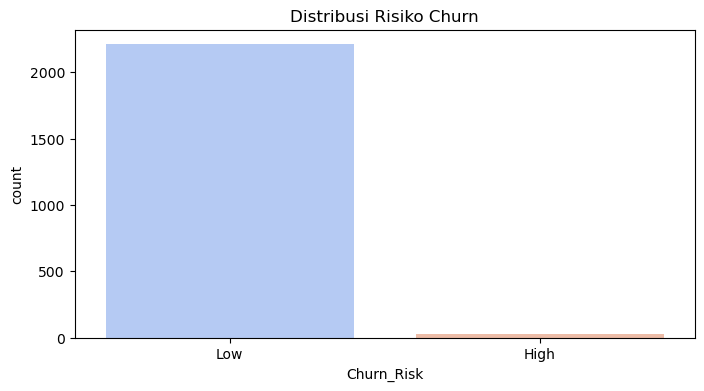

In [49]:
# 2. Churn Prediction - Jika Recency tinggi dan Frequency rendah, pelanggan berisiko churn
df['Churn_Risk'] = df.apply(lambda row: 'High' if row['Recency'] > 90 and row['Frequency'] < 5 else 'Low', axis=1)
plt.figure(figsize=(8, 4))
sns.countplot(x='Churn_Risk', data=df, palette='coolwarm')
plt.title('Distribusi Risiko Churn')
plt.show()

2️⃣ Distribusi Risiko Churn
📊 Visualisasi: Countplot (bar chart) untuk kategori High Churn Risk vs. Low Churn Risk

🔍 Apa yang dianalisis?
Grafik ini membandingkan jumlah pelanggan dengan risiko churn tinggi dan rendah. Risiko churn ditentukan berdasarkan:

Recency > 90 hari (lama tidak berbelanja)

Frequency < 5 kali (jarang berbelanja)

🧐 Apa insight-nya?

Jika jumlah pelanggan dengan risiko churn tinggi lebih banyak, berarti ada banyak pelanggan yang tidak aktif dan perlu strategi retensi.

Jika risiko churn rendah dominan, berarti mayoritas pelanggan masih aktif.

💡 Tindakan CRM:

Buat kampanye retensi pelanggan untuk pelanggan dengan risiko churn tinggi (contoh: diskon khusus atau reminder pembelian).

Lakukan analisis lebih lanjut untuk memahami alasan mengapa pelanggan churn.



/var/folders/jh/3gj_twjn05z7rk56ml5f771m0000gn/T/ipykernel_2451/1416837624.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loyalty_Status', y='Engagement_Score', data=df, palette='viridis')


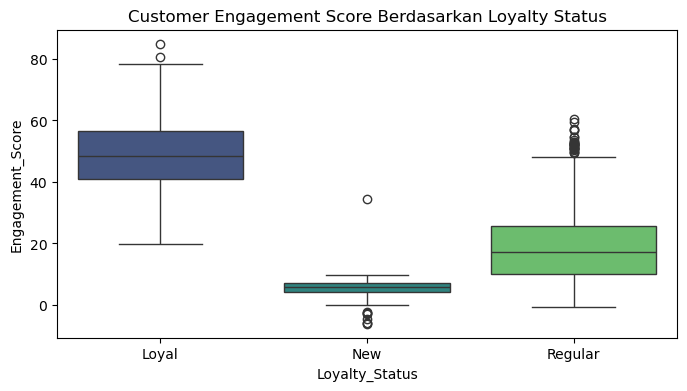

In [50]:
# 3. Customer Engagement Score - Berdasarkan aktivitas pelanggan (Monetary, Frequency, dan Complaints)
df['Engagement_Score'] = (df['Monetary'] / df['Monetary'].max()) * 0.5 + (df['Frequency'] / df['Frequency'].max()) * 0.4 - (df['Complain'] * 0.1)
df['Engagement_Score'] = df['Engagement_Score'] * 100
# 4. Loyalty Status - Berdasarkan Frequency
df['Loyalty_Status'] = df['Frequency'].apply(lambda x: 'Loyal' if x > 15 else ('Regular' if x > 5 else 'New'))
plt.figure(figsize=(8, 4))
sns.boxplot(x='Loyalty_Status', y='Engagement_Score', data=df, palette='viridis')
plt.title('Customer Engagement Score Berdasarkan Loyalty Status')
plt.show()

3️⃣ Customer Engagement Score Berdasarkan Loyalty Status
📊 Visualisasi: Boxplot untuk Engagement Score berdasarkan kategori Loyal, Regular, dan New

🔍 Apa yang dianalisis?
Boxplot ini menunjukkan sebaran skor keterlibatan pelanggan berdasarkan kategori loyalitas:

Loyal → Sering berbelanja (Frequency > 15)

Regular → Berbelanja sedang (5 ≤ Frequency ≤ 15)

New → Jarang berbelanja (Frequency < 5)

🧐 Apa insight-nya?

Jika Loyal memiliki skor keterlibatan tinggi → Ini menunjukkan pelanggan setia sangat aktif.

Jika ada banyak outlier pada Regular atau New, bisa jadi ada segmen pelanggan yang memiliki keterlibatan tinggi meskipun belum loyal.

Jika New memiliki keterlibatan sangat rendah, perlu strategi onboarding yang lebih baik.

💡 Tindakan CRM:

Untuk pelanggan Loyal, beri program reward atau eksklusifitas agar tetap setia.

Untuk pelanggan Regular, dorong mereka menjadi loyal dengan promosi personalisasi.

Untuk pelanggan New, buat kampanye engagement agar mereka lebih aktif.



In [51]:
# Menambahkan kolom yang hilang ke dalam dataframe

# 1. Menghitung Customer Lifetime Value (CLV) sederhana
df["CLV"] = df["Monetary"] * 5  # Asumsi nilai pelanggan selama 5 tahun

# 2. Menentukan Churn Risk (High jika Recency > 90 hari dan Frequency < 5)
df["Churn_Risk"] = df.apply(lambda x: "High" if (x["Recency"] > 90 and x["Frequency"] < 5) else "Low", axis=1)

# 3. Menentukan Loyalty Status berdasarkan Frequency
def loyalty_status(frequency):
    if frequency > 15:
        return "Loyal"
    elif frequency >= 5:
        return "Regular"
    else:
        return "New"

df["Loyalty_Status"] = df["Frequency"].apply(loyalty_status)


In [52]:
df.head()

,ID,Education,Marital_Status,Income,Recency,Wine_Spending,Fruit_Spending,Meat_Spending,Fish_Spending,Sweet_Spending,...,Monetary,Frequency,Age,Length,Total_Campaign,Cluster_Group,CLV,Churn_Risk,Engagement_Score,Loyalty_Status
0,5524,Middle,Single,58138.0,58,635,88,546,172,88,...,1617,22,50-59,1213,1,1,8085,Low,59.519802,Loyal
1,2174,Middle,Single,46344.0,38,11,1,6,2,1,...,27,4,60-69,663,0,0,135,Low,5.534653,New
2,4141,Middle,Others,71613.0,26,426,49,127,111,21,...,776,20,50-59,862,0,2,3880,Low,40.366337,Loyal
3,6182,Middle,Others,26646.0,26,11,4,20,10,3,...,53,6,30-39,689,0,0,265,Low,8.549505,Regular
4,5324,Master,Married,58293.0,94,173,43,118,46,27,...,422,14,30-39,711,0,0,2110,Low,25.856436,Regular


In [ ]:
df.to_csv('filename.csv', index=False)